In [4]:
# !git clone https://github.com/lcondoriz/TA047R-2C2024-GRUPO02.git
# !mv TA047R-2C2024-GRUPO02/TP2/* .
# !rm -rf TA047R-2C2024-GRUPO02
# !rm -rf sample_data

# !pip install category-encoders

**Organización de Datos**

Trabajo Práctico N°2: Story Points

Grupo 02 - Célestine Raveneau, Florian Escaffre, Juan Gomez, Luis Condori

Cátedra Ing. Rodriguez, Juan Manuel - 2C2024


**Columnas**

El conjunto de datos es una serie de casos de uso o user stories de diversos proyectos, para las cuales se tiene el número de story points que indican la complejidad de cada tarea. Se intentará predecir los story points para un texto dado como user story

**Descripción de columnas**

* **title**: Título de la user story.

* **description**: Descripción de la user story.

* **project**: Nombre del proyecto en el cual esa user story se crea.

* **storypoint**: Puntaje (nivel de complejidad) de la user story.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [7]:
df_train.head(10)

,id,title,description,project,storypoint
0,5660,Error enabling Appcelerator services during ap...,"When creating the default app, I encountered t...",project8,3
1,9014,Create a maintenance branch,"As a developer, I'd like to have a maintenance...",project6,5
2,4094,Service Activity Monitoring Backend integrated...,SAM API used by SAM GUI,project1,5
3,811,fs::enter(rootfs) does not work if 'rootfs' is...,I noticed this when I was testing the unified ...,project5,2
4,4459,transform processor with script option is broken,Creating the following stream throws exception...,project6,2
5,8896,Service Registry: REST endpoints URL renaming,Endpoint URLs of Service Registry REST service...,project1,1
6,2304,TiStudio: Projects - A pane is missing when cr...,Details: If you try to create the default Tita...,project8,5
7,9192,Avoid installing test and performance services...,The membership plans are associated with organ...,project8,5
8,1888,Add Unit Tests for CC SPI infrastructure,"Test Converter, Configuration, Definition and ...",project6,3
9,4609,Agent should not return partial state when a r...,Currently when a user is hitting /state.json o...,project5,3


# Análisis Exploratorio

## Exploración Inicial

In [8]:
df_train.shape

(7900, 5)

In [9]:
print(df_train.columns.values)

['id' 'title' 'description' 'project' 'storypoint']


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           7900 non-null   int64 
 1   title        7900 non-null   object
 2   description  7900 non-null   object
 3   project      7900 non-null   object
 4   storypoint   7900 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 308.7+ KB


In [11]:
df_train['storypoint'].unique()

array([ 3,  5,  2,  1,  8, 13,  4, 40,  6, 20, 10, 15, 32, 12, 16, 21, 34,
       14, 24,  7], dtype=int64)

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_train.isnull().sum()

id             0
title          0
description    0
project        0
storypoint     0
dtype: int64

In [14]:
df_train.describe()

,id,storypoint
count,7900.000000,7900.000000
mean,4951.059620,3.885190
std,2853.243052,3.027804
min,1.000000,1.000000
25%,2475.750000,2.000000
50%,4970.500000,3.000000
75%,7413.250000,5.000000
max,9874.000000,40.000000


In [15]:
df_train["storypoint"].value_counts()

storypoint
3     1848
5     1693
1     1629
2     1276
8     1025
4      166
13     154
10      32
20      31
6       17
16       7
12       6
40       5
21       3
15       2
7        2
32       1
34       1
14       1
24       1
Name: count, dtype: int64

## Valores Faltantes

### Train

In [16]:
df_train.isnull().sum()

id             0
title          0
description    0
project        0
storypoint     0
dtype: int64

### Test

In [17]:
df_test.isnull().sum()

id             0
title          0
description    0
project        0
dtype: int64

## Outliers

In [18]:
def modified_z_score(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    z_mod = 0.6745 * (column - median) / mad
    return z_mod

def calculate_outliers_percentage(train):
    outliers_percentage = {}

    for col in train.select_dtypes(include=[np.number]):
        z_scores = modified_z_score(train[col].dropna())
        outliers = np.abs(z_scores) > 3.5
        outliers_percentage[col] = np.sum(outliers) / len(train[col].dropna()) * 100

    return outliers_percentage

In [19]:
outliers_percent = calculate_outliers_percentage(df_train)

for col, percent in outliers_percent.items():
    print(f"{col}: {percent:.2f}% of outliers")


id: 0.00% of outliers
storypoint: 0.66% of outliers


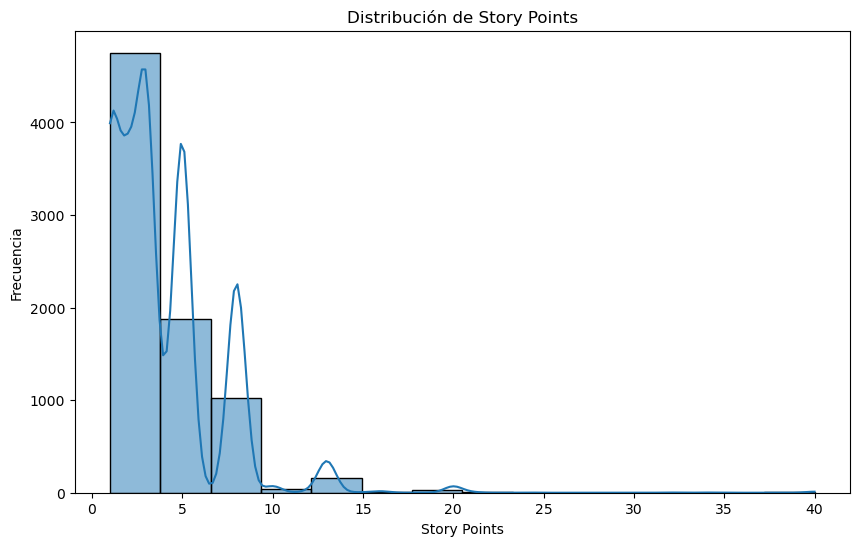

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Story Points
plt.figure(figsize=(10, 6))
sns.histplot(df_train['storypoint'], bins=14, kde=True)
plt.title('Distribución de Story Points')
plt.xlabel('Story Points')
plt.ylabel('Frecuencia')
plt.show()

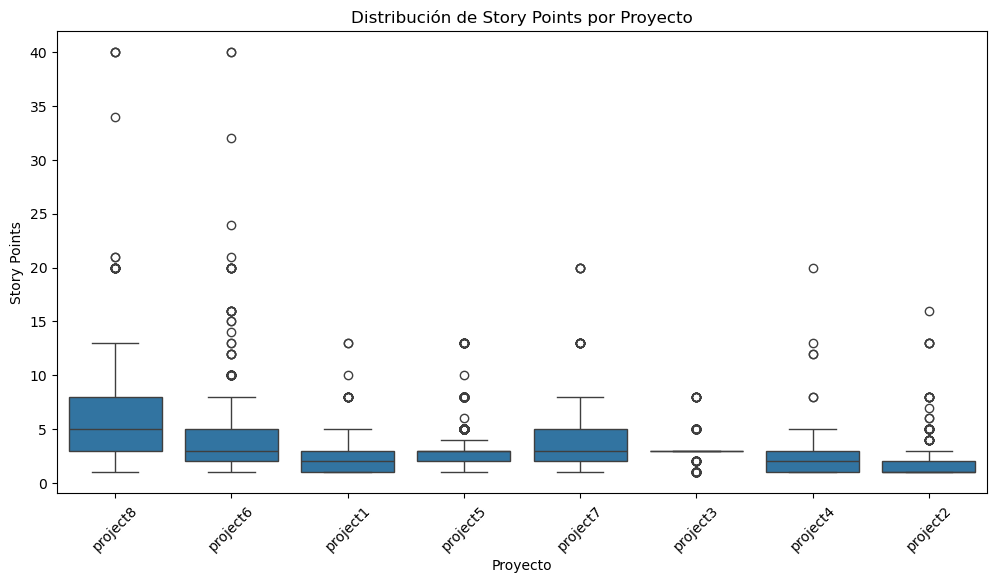

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='project', y='storypoint', data=df_train)
plt.title('Distribución de Story Points por Proyecto')
plt.xlabel('Proyecto')
plt.ylabel('Story Points')
plt.xticks(rotation=45)
plt.show()

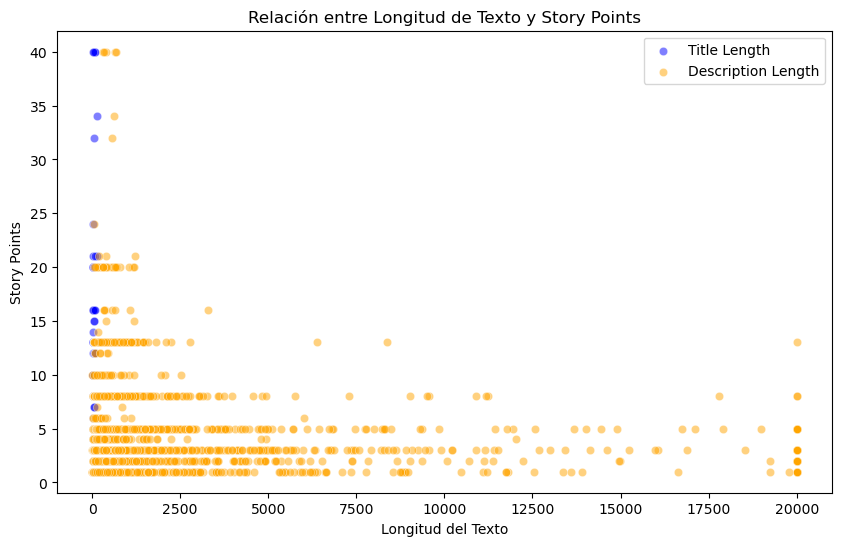

In [22]:
# Añadir longitud de título y descripción
df_train['title_length'] = df_train['title'].apply(len)
df_train['description_length'] = df_train['description'].apply(len)

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='title_length', y='storypoint', data=df_train, color='blue', alpha=0.5, label='Title Length')
sns.scatterplot(x='description_length', y='storypoint', data=df_train, color='orange', alpha=0.5, label='Description Length')
plt.title('Relación entre Longitud de Texto y Story Points')
plt.xlabel('Longitud del Texto')
plt.ylabel('Story Points')
plt.legend()
plt.show()


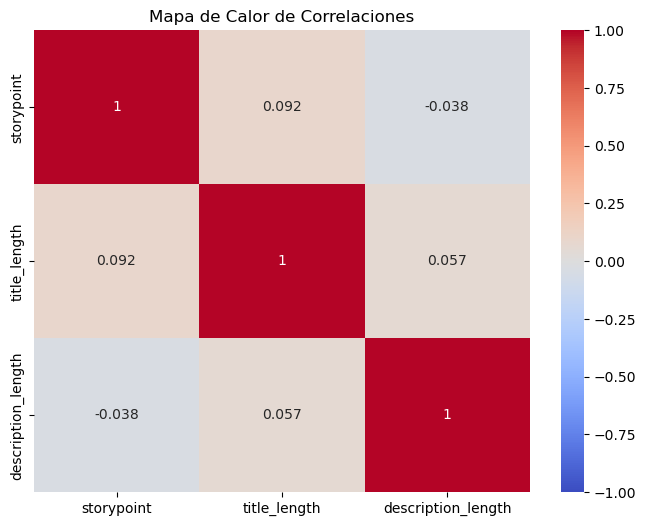

In [23]:
import numpy as np

# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(df_train[['storypoint', 'title_length', 'description_length']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


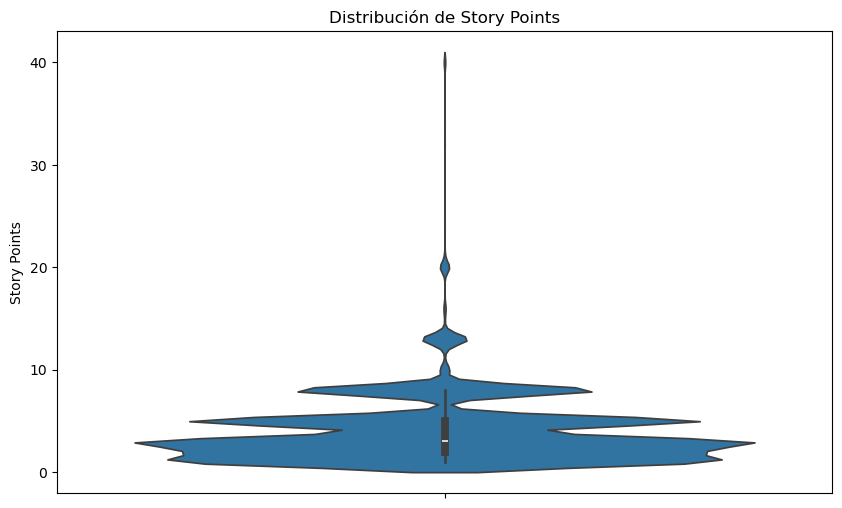

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(y='storypoint', data=df_train)
plt.title('Distribución de Story Points')
plt.ylabel('Story Points')
plt.show()


# Preprocesamiento de datos

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder

# Import models
from sklearn.linear_model import LinearRegression

# Import metrics
from sklearn.metrics import root_mean_squared_error
# otras metricas  MSE, MAE, R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from category_encoders import BinaryEncoder

In [26]:
# Funtions
from scripts.functions import *

# Modelos

Modelos a entrenar:
- **Baseline**: Regresión Lineal
- **Bayes Naive**
- **Random Forest**
- **XGBoost**
- **Red Neuronal** (Keras y Tensorflow)
- **Ensamble** (3 modelos)

Se utilizará el mismo preprocesamiento del dataset para cada uno de los modelos.

## Preprocesamiento de datos

In [27]:
import re
import regex
import spacy

# Cargar el modelo de spaCy una sola vez
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
        
    # eliminar multiples espacios
    text = re.sub(r'\s+', ' ', text)

    # Eliminar bloques de código y contenido entre llaves
    text = regex.sub(r'\{(?:[^{}]|(?R))*\}', ' ', text)
    
    doc = nlp(text.lower())
    
    tokens = [token.lemma_ for token in doc 
                if not token.is_space # Eliminar espacios
                and not token.is_punct # Eliminar signos de puntuación
                and not token.like_num # Eliminar números
                and not token.is_stop # Eliminar stoptokens
                #and not token.is_currency # Eliminar símbolos de moneda
                and not token.like_url # Eliminar URLs
                and not token.like_email # Eliminar emails
                and len(token) > 2 # Eliminar palabras de menos de 3 caracteres
                ]
    
    return ' '.join(tokens)

In [28]:
df_train["title"] = df_train["title"].transform(lambda x: clean_text(x))
df_train["description"] = df_train["description"].transform(lambda x: clean_text(x))

df_test["title"] = df_test["title"].transform(lambda x: clean_text(x))
df_test["description"] = df_test["description"].transform(lambda x: clean_text(x))


## Baseline: LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
seed = 42

In [31]:
X = df_train[['title', 'description', 'project']].copy()
y = df_train['storypoint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', TfidfVectorizer(), 'title'),
        ('description_bow', TfidfVectorizer(), 'description'),
        ('project_ohe', OneHotEncoder(drop='first'), ['project']),
    ]
)

In [33]:
pipeline_rl = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

param_dist_lr = {
    'preprocessor__title_bow__max_features': [300, 500, 1000, 5000],
    'preprocessor__title_bow__max_df': [0.8, 0.9, 1.0],
    'preprocessor__title_bow__min_df': [1, 2, 3],
    'preprocessor__title_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__title_bow__stop_words': ['english'],
    'preprocessor__title_bow__binary': [True, False],

    'preprocessor__description_bow__max_features': [300, 500, 1000, 5000],
    'preprocessor__description_bow__max_df': [0.8, 0.9, 1.0],
    'preprocessor__description_bow__min_df': [1, 2, 3],
    'preprocessor__description_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__description_bow__stop_words': ['english'],
    'preprocessor__description_bow__binary': [True, False],

    'model__fit_intercept': [True, False],
}

cv = KFold(n_splits=5, shuffle=True, random_state=seed)

n_iter_search = 100

random_search_lr = RandomizedSearchCV(
    pipeline_rl, 
    param_distributions=param_dist_lr, 
    n_iter=n_iter_search,
    scoring='neg_root_mean_squared_error', 
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=seed
)

In [34]:
visu, time = measure_execution_time(random_search_lr.fit, X_train, y_train)
visu

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 6.8594 s
Wall time: 1 min 50 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('title_bow',
                                                                               TfidfVectorizer(),
                                                                               'title'),
                                                                              ('description_bow',
                                                                               TfidfVectorizer(),
                                                                               'description'),
                                                                              ('project_ohe',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['project'])])),
                                             ('model', LinearRegression())]),
                   n_iter=100, n_jobs=-1,
                   para...
                                        'preprocessor__title_bow__binary': [True,
                                                                            False],
                                        'preprocessor__title_bow__max_df': [0.8,
                                                                            0.9,
                                                                            1.0],
                                        'preprocessor__title_bow__max_features': [300,
                                                                                  500,
                                                                                  1000,
                                                                                  5000],
                                        'preprocessor__title_bow__min_df': [1,
                                                                            2,
                                                                            3],
                                        'preprocessor__title_bow__ngram_range': [(1,
                                                                                  1),
                                                                                 (1,
                                                                                  2)],
                                        'preprocessor__title_bow__stop_words': ['english']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [35]:
# Best RMSE and best hyperparameters
print(f'Mejor RMSE: {-random_search_lr.best_score_}') # Average all models RMSE
print(f'Mejores hiperparámetros: {random_search_lr.best_params_}\n')

# Train RMSE
y_pred_train = random_search_lr.best_estimator_.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'RMSE en el conjunto de train: {rmse_train}')

# Test RMSE
y_pred_test = random_search_lr.best_estimator_.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'RMSE en el conjunto de prueba: {rmse_test}\n')

Mejor RMSE: 2.742398821672412
Mejores hiperparámetros: {'preprocessor__title_bow__stop_words': 'english', 'preprocessor__title_bow__ngram_range': (1, 2), 'preprocessor__title_bow__min_df': 1, 'preprocessor__title_bow__max_features': 300, 'preprocessor__title_bow__max_df': 1.0, 'preprocessor__title_bow__binary': True, 'preprocessor__description_bow__stop_words': 'english', 'preprocessor__description_bow__ngram_range': (1, 2), 'preprocessor__description_bow__min_df': 3, 'preprocessor__description_bow__max_features': 300, 'preprocessor__description_bow__max_df': 0.8, 'preprocessor__description_bow__binary': True, 'model__fit_intercept': True}

RMSE en el conjunto de train: 2.383959066142569
RMSE en el conjunto de prueba: 2.689858894948199



In [36]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE en el conjunto de train: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}\n')

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en el conjunto de train: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}\n')

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en el conjunto de train: {r2_train}')
print(f'R2 en el conjunto de prueba: {r2_test}')

MSE en el conjunto de train: 5.68326082904335
MSE en el conjunto de prueba: 7.235340874731947

MAE en el conjunto de train: 1.6479094193514832
MAE en el conjunto de prueba: 1.8085311371485095

R2 en el conjunto de train: 0.37516639966934806
R2 en el conjunto de prueba: 0.22428737915082853


### Guardamos resultados en JSON

In [37]:
results_rl = {
    'model': 'LinearRegression',
    'best_params': random_search_lr.best_params_,
    'best_score': -random_search_lr.best_score_,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'seed': seed,
    'transformers': obtener_transformadores(preprocessor),
    'hyperparameters': param_dist_lr,
    'time': time,
    'n_iter': n_iter_search
}

### Submision Baseline Regresión Lineal

In [38]:
y_pred = random_search_lr.best_estimator_.predict(df_test)
submission_test = pd.DataFrame({'id': df_test['id'], 'storypoint': y_pred})
submission_test.to_csv('./submission/submission_linear_regression.csv', index=False)

## Bayes Naive

Si se omite la columna `title` el modelo no ve alterado su rendimiento RMSE, se podria decir que es una columna que no aporta información relevante para el modelo.

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
seed = 42

In [41]:
X = df_train[['title', 'description', 'project']].copy()
y = df_train['storypoint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', TfidfVectorizer(), 'title'),
        ('description_bow', TfidfVectorizer(), 'description'),
        ('project_ohe', OneHotEncoder(drop='first'), ['project']),
    ]
)

pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultinomialNB())
])

param_dist_nb = {
    # CountVectorizer
    'preprocessor__title_bow__max_features': [None, 100, 500, 1000],
    'preprocessor__title_bow__max_df': [0.8, 0.9, 1.0],
    'preprocessor__title_bow__min_df': [1, 2, 3],
    'preprocessor__title_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__title_bow__stop_words': ['english', None],
    'preprocessor__title_bow__binary': [True, False],

    'preprocessor__description_bow__max_features': [None, 100, 500, 1000],
    'preprocessor__description_bow__max_df': [0.8, 0.9, 1.0],
    'preprocessor__description_bow__min_df': [1, 2, 3],
    'preprocessor__description_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__description_bow__stop_words': ['english', None],
    'preprocessor__description_bow__binary': [True, False],

    # Hiperparámetros de MultinomialNB
    'model__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],  # Suavizado de Laplace
    'model__fit_prior': [True, False],  # Ajustar probabilidades a priori
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search_nb = RandomizedSearchCV(
    pipeline_nb, 
    param_distributions=param_dist_nb, 
    n_iter=150,
    scoring='neg_root_mean_squared_error', 
    cv=cv, 
    n_jobs=-1,
    verbose=2,
    random_state=seed,
)

In [43]:
visu, time = measure_execution_time(random_search_nb.fit, X_train, y_train)
visu

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: total: 9.8594 s
Wall time: 1 min 9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('title_bow',
                                                                               TfidfVectorizer(),
                                                                               'title'),
                                                                              ('description_bow',
                                                                               TfidfVectorizer(),
                                                                               'description'),
                                                                              ('project_ohe',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['project'])])),
                                             ('model', MultinomialNB())]),
                   n_iter=150, n_jobs=-1,
                   param_d...
                                        'preprocessor__title_bow__binary': [True,
                                                                            False],
                                        'preprocessor__title_bow__max_df': [0.8,
                                                                            0.9,
                                                                            1.0],
                                        'preprocessor__title_bow__max_features': [None,
                                                                                  100,
                                                                                  500,
                                                                                  1000],
                                        'preprocessor__title_bow__min_df': [1,
                                                                            2,
                                                                            3],
                                        'preprocessor__title_bow__ngram_range': [(1,
                                                                                  1),
                                                                                 (1,
                                                                                  2)],
                                        'preprocessor__title_bow__stop_words': ['english',
                                                                                None]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [44]:
# Best RMSE and parameters
print(f'Best RMSE: {-random_search_nb.best_score_}')  # Average of 5 scores (because cv=5)
print(f'Best hyperparameters: {random_search_nb.best_params_}\n')

# Train RMSE
y_pred_train = random_search_nb.best_estimator_.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'TRAIN RMSE: {rmse_train}')

# Test RMSE
y_pred_test = random_search_nb.best_estimator_.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'TEST RMSE : {rmse_test}')

Best RMSE: 2.8197174864304535
Best hyperparameters: {'preprocessor__title_bow__stop_words': 'english', 'preprocessor__title_bow__ngram_range': (1, 1), 'preprocessor__title_bow__min_df': 2, 'preprocessor__title_bow__max_features': 100, 'preprocessor__title_bow__max_df': 1.0, 'preprocessor__title_bow__binary': False, 'preprocessor__description_bow__stop_words': None, 'preprocessor__description_bow__ngram_range': (1, 1), 'preprocessor__description_bow__min_df': 3, 'preprocessor__description_bow__max_features': None, 'preprocessor__description_bow__max_df': 0.9, 'preprocessor__description_bow__binary': True, 'model__fit_prior': True, 'model__alpha': 1000}

TRAIN RMSE: 2.823980236497805
TEST RMSE : 2.8346857035612754


In [45]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE en el conjunto de train: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}\n')

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en el conjunto de train: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}\n')

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en el conjunto de train: {r2_train}')
print(f'R2 en el conjunto de prueba: {r2_test}')

MSE en el conjunto de train: 7.974864376130199
MSE en el conjunto de prueba: 8.035443037974684

MAE en el conjunto de train: 1.778119349005425
MAE en el conjunto de prueba: 1.7561181434599156

R2 en el conjunto de train: 0.12322109257743485
R2 en el conjunto de prueba: 0.13850712957563371


In [46]:
results_nb = {
    'model': 'MultinomialNB',
    'best_params': random_search_nb.best_params_,
    'best_score': -random_search_nb.best_score_,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'seed': seed,
    'transformers': obtener_transformadores(preprocessor),
    'hyperparameters': param_dist_nb,
    'time': time,
    'n_iter': n_iter_search
}

save_model_results(results_nb)

In [47]:
y_pred = random_search_nb.best_estimator_.predict(df_test)
submission_test = pd.DataFrame({'id': df_test['id'], 'storypoint': y_pred})
submission_test.to_csv('./submission/submission_multinomial_nbayes.csv', index=False)

In [49]:
save_model(random_search_nb.best_estimator_, './models', 'multinomial_nbayes.joblib')

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
seed = 4222

In [52]:
X = df_train[['title', 'description', 'project']].copy()
y = df_train['storypoint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', TfidfVectorizer(), 'title'),
        ('description_bow', TfidfVectorizer(), 'description'),
        ('project_ohe', OneHotEncoder(drop='first'), ['project']),
    ]
)

In [ ]:
pipeline_nb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=seed)),
])

param_dist_rf = {
    'preprocessor__title_bow__max_features': [300, 500, 1000, 5000],
    'preprocessor__title_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__title_bow__stop_words': ['english'],

    'preprocessor__description_bow__max_features': [300, 500, 1000, 5000],
    'preprocessor__description_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__description_bow__stop_words': ['english'],

    # Hiperparámetros de RandomForestRegressor
    'model__n_estimators': [20, 50, 100, 200],  # Número de árboles
    'model__max_depth': [3, 5, 8, 10, 20, 30, 50, 100],  # Profundidad máxima de los árboles
    'model__min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'model__min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja

    'model__ccp_alpha': [0.0, 0.1, 0.2],  # Parámetro de complejidad
}

cv = KFold(n_splits=3, shuffle=True, random_state=seed)

n_iter_search = 100

random_search_rf = RandomizedSearchCV(
    pipeline_nb, 
    param_distributions=param_dist_rf, 
    n_iter=n_iter_search,
    scoring='neg_root_mean_squared_error', 
    cv=cv, 
    n_jobs=-1,
    verbose=2,
    random_state=seed
)

In [55]:
visu, time = measure_execution_time(random_search_rf.fit, X_train, y_train)
visu

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: total: 54.3750 s
Wall time: 10 min 6 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=4222, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('title_bow',
                                                                               TfidfVectorizer(),
                                                                               'title'),
                                                                              ('description_bow',
                                                                               TfidfVectorizer(),
                                                                               'description'),
                                                                              ('project_ohe',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['project'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=4222))]),
                   n...
                                                                                        5000],
                                        'preprocessor__description_bow__ngram_range': [(1,
                                                                                        1),
                                                                                       (1,
                                                                                        2)],
                                        'preprocessor__description_bow__stop_words': ['english'],
                                        'preprocessor__title_bow__max_features': [300,
                                                                                  500,
                                                                                  1000,
                                                                                  5000],
                                        'preprocessor__title_bow__ngram_range': [(1,
                                                                                  1),
                                                                                 (1,
                                                                                  2)],
                                        'preprocessor__title_bow__stop_words': ['english']},
                   random_state=4222, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [60]:
# Mejor RMSE y parámetros
print(f'Mejor RMSE: {-random_search_rf.best_score_}')  # Promedio de 5 scores (porque cv=5)
print(f'Mejores hiperparámetros: {random_search_rf.best_params_}\n')

# Conjunto train
y_pred_train = random_search_rf.best_estimator_.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'RMSE en el conjunto de train: {rmse_train}')

# Conjunto prueba
y_pred_test = random_search_rf.best_estimator_.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'RMSE en el conjunto de prueba: {rmse_test}')

Mejor RMSE: 2.5581231484256706
Mejores hiperparámetros: {'preprocessor__title_bow__stop_words': 'english', 'preprocessor__title_bow__ngram_range': (1, 1), 'preprocessor__title_bow__max_features': 300, 'preprocessor__description_bow__stop_words': 'english', 'preprocessor__description_bow__ngram_range': (1, 1), 'preprocessor__description_bow__max_features': 5000, 'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 4, 'model__max_depth': 30, 'model__ccp_alpha': 0.0}

RMSE en el conjunto de train: 1.8038251538330836
RMSE en el conjunto de prueba: 2.688588059735108


In [61]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE en el conjunto de train: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}\n')

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en el conjunto de train: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}\n')

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en el conjunto de train: {r2_train}')
print(f'R2 en el conjunto de prueba: {r2_test}')

MSE en el conjunto de train: 3.2537851856009476
MSE en el conjunto de prueba: 7.228505754950194

MAE en el conjunto de train: 1.1883493857164673
MAE en el conjunto de prueba: 1.6563785726380842

R2 en el conjunto de train: 0.6276932274415385
R2 en el conjunto de prueba: 0.2886094377140648


In [62]:
results_rf = {
    'model': 'RandomForestRegressor',
    'best_params': random_search_rf.best_params_,
    'best_score': -random_search_rf.best_score_,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'seed': seed,
    'transformers': obtener_transformadores(preprocessor),
    'hyperparameters': param_dist_rf,
    'time': time,
    'n_iter': n_iter_search
}

save_model_results(results_rf)

In [63]:
y_pred = random_search_rf.best_estimator_.predict(df_test)
submission_test = pd.DataFrame({'id': df_test['id'], 'storypoint': y_pred})

submission_test.to_csv('./submission/submission_random_forest.csv', index=False)

In [64]:
save_model(random_search_rf.best_estimator_, './models', 'random_forest.joblib')

## XGBoost

In [65]:
from xgboost import XGBRegressor

In [66]:
seed = 7777

In [70]:
X = df_train[['title', 'description', 'project']].copy()
y = df_train['storypoint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', TfidfVectorizer(), 'title'),
        ('description_bow', TfidfVectorizer(), 'description'),
        ('project_ohe', OneHotEncoder(drop='first'), ['project']),
    ]
)

In [72]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [73]:
param_dist_xgb= {
    # CountVectorizer--> max_features: número máximo de palabras a considerar
    'preprocessor__title_bow__max_features': [200, 300, 500, 1000],
    'preprocessor__title_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__title_bow__stop_words': ['english'],# None],
    #'preprocessor__title_bow__binary': [True, False],

    'preprocessor__description_bow__max_features': [500, 700, 1000],
    'preprocessor__description_bow__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__description_bow__stop_words': ['english'],#, None],
    #'preprocessor__description_bow__binary': [True, False],

    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 8, 10, 15, 20],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.6, 0.7, 0.8],
    'model__colsample_bytree': [0.6, 0.7, 0.8],
    'model__gamma': [0, 0.1, 0.2],
    'model__alpha': [0, 0.1, 1],
    'model__lambda': [1, 1.5, 2]
}

cv = KFold(n_splits=3, shuffle=True, random_state=seed)

n_iter_search = 30

random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist_xgb,
    n_iter=n_iter_search,
    scoring='neg_root_mean_squared_error', 
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=seed
)


In [74]:
visu, time = measure_execution_time(random_search_xgb.fit, X_train, y_train)
visu

Fitting 3 folds for each of 30 candidates, totalling 90 fits
CPU times: total: 400.6562 s
Wall time: 7 min 5 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=7777, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('title_bow',
                                                                               TfidfVectorizer(),
                                                                               'title'),
                                                                              ('description_bow',
                                                                               TfidfVectorizer(),
                                                                               'description'),
                                                                              ('project_ohe',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['project'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           cal...
                                                                                        1000],
                                        'preprocessor__description_bow__ngram_range': [(1,
                                                                                        1),
                                                                                       (1,
                                                                                        2)],
                                        'preprocessor__description_bow__stop_words': ['english'],
                                        'preprocessor__title_bow__max_features': [200,
                                                                                  300,
                                                                                  500,
                                                                                  1000],
                                        'preprocessor__title_bow__ngram_range': [(1,
                                                                                  1),
                                                                                 (1,
                                                                                  2)],
                                        'preprocessor__title_bow__stop_words': ['english']},
                   random_state=7777, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [79]:
# Mejor RMSE y parámetros
print(f'Mejor RMSE: {-random_search_xgb.best_score_}')  # Promedio de 5 scores (porque cv=5)
print(f'Mejores hiperparámetros: {random_search_xgb.best_params_}\n')

# Conjunto train
y_pred_train = random_search_xgb.best_estimator_.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'RMSE en el conjunto de train: {rmse_train}\n')

# Conjunto prueba
y_pred_test = random_search_xgb.best_estimator_.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'RMSE en el conjunto de prueba: {rmse_test}')

Mejor RMSE: 2.6930071931161126
Mejores hiperparámetros: {'preprocessor__title_bow__stop_words': 'english', 'preprocessor__title_bow__ngram_range': (1, 1), 'preprocessor__title_bow__max_features': 500, 'preprocessor__description_bow__stop_words': 'english', 'preprocessor__description_bow__ngram_range': (1, 2), 'preprocessor__description_bow__max_features': 1000, 'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_depth': 20, 'model__learning_rate': 0.01, 'model__lambda': 1, 'model__gamma': 0.2, 'model__colsample_bytree': 0.6, 'model__alpha': 0}

RMSE en el conjunto de train: 1.6637862023003536

RMSE en el conjunto de prueba: 2.5762766406793247


In [80]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE en el conjunto de train: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}\n')

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en el conjunto de train: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}\n')

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en el conjunto de train: {r2_train}')
print(f'R2 en el conjunto de prueba: {r2_test}')

MSE en el conjunto de train: 2.768184526965033
MSE en el conjunto de prueba: 6.637201329309947

MAE en el conjunto de train: 1.2108298247804694
MAE en el conjunto de prueba: 1.7049065893209434

R2 en el conjunto de train: 0.7037195563316345
R2 en el conjunto de prueba: 0.24182355403900146


In [81]:
results_xgb = {
    'model': 'XGBRegressor',
    'best_params': random_search_xgb.best_params_,
    'best_score': -random_search_xgb.best_score_,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'seed': seed,
    'transformers': obtener_transformadores(preprocessor),
    'hyperparameters': param_dist_xgb,
    'time': time,
    'n_iter': n_iter_search
}

save_model_results(results_xgb)

In [82]:
y_pred = random_search_xgb.best_estimator_.predict(df_test)
submission_test = pd.DataFrame({'id': df_test['id'], 'storypoint': y_pred})

submission_test.to_csv('./submission/submission_xgboost.csv', index=False)

In [83]:
save_model(random_search_xgb.best_estimator_, './models', 'xgboost.joblib')

## Red neuronal (Keras / Tensor Flow)

### Preprocesamiento de datos

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

In [85]:
X = df_train[['title', 'description', 'project']].copy()
y = df_train['storypoint']

X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('title_bow', TfidfVectorizer(), 'title'),
        ('description_bow', TfidfVectorizer(), 'description'),
        ('project_ohe', OneHotEncoder(), ['project']),
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('scaler', StandardScaler(with_mean=False))
])

X_train = pipeline.fit_transform(X_train_unprocessed)
X_test = pipeline.transform(X_test_unprocessed)



### Red 1

c:\Users\lufer\miniconda3\envs\TP2-CD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.5912 - mae: 2.8083 - val_loss: 8.5055 - val_mae: 1.9254
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7254 - mae: 2.0171 - val_loss: 8.1074 - val_mae: 1.8652
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.4052 - mae: 1.9339 - val_loss: 7.9495 - val_mae: 1.8072
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6234 - mae: 1.8865 - val_loss: 7.8889 - val_mae: 1.8287
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6018 - mae: 1.8621 - val_loss: 7.8396 - val_mae: 1.8259
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.1164 - mae: 1.8401 - val_loss: 7.8002 - val_mae: 1.8311
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7476 - mae: 1.7634 - val_loss: 7.7854 - val_mae: 1.8577
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.3585 - mae: 1.8253 - val_loss: 7.6997 - val_mae: 1.7656
Epoch 9/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

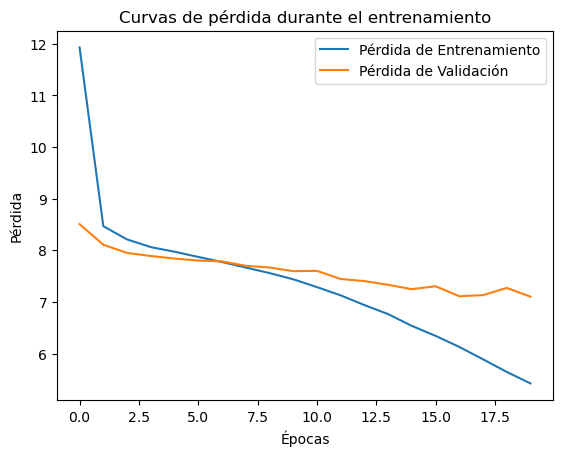

In [87]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definir el modelo Keras con los mejores hiperparámetros
model = keras.Sequential([
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # 32 neuronas, activación ReLU
    layers.Dense(1)  # Capa de salida con un solo neurona para regresión
])

# Compilar el modelo con el mejor optimizador y tasa de aprendizaje
optimizer = keras.optimizers.SGD(learning_rate=0.001)  # Usar optimizador SGD con tasa de aprendizaje 0.001
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])  # Pérdida de MSE y métrica MAE

# Entrenar el modelo con los mejores hiperparámetros
history = model.fit(
    X_train, y_train,
    epochs=20,               # Mejor número de épocas
    batch_size=16,           # Mejor tamaño de lote
    validation_split=0.2,    # Validación con 20% de los datos de entrenamiento
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error (MAE): {mae}')

# Hacer predicciones sobre el conjunto de prueba
y_test_pred = model.predict(X_test) # Remove the second prediction using X_test
y_train_pred = model.predict(X_train) # Remove the second prediction using X_test

# Calcular las métricas para la evaluación del modelo
# Para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'MSE (Entrenamiento) : {mse_train}')
print(f'RMSE (Entrenamiento) : {rmse_train}')
print(f'MAE (Entrenamiento) : {mae_train}')
print(f'R2 (Entrenamiento) : {r2_train}')

# Para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE (Prueba) : {mse_test}')
print(f'RMSE (Prueba) : {rmse_test}')
print(f'MAE (Prueba) : {mae_test}')
print(f'R2 (Prueba) : {r2_test}')


# Visualizar las curvas de pérdida de entrenamiento y validación
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.title('Curvas de pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


In [88]:
save_model(model, './models', 'neural_network.joblib')

### Red 2

1. **`num_layers`**:  
   - Tipo: Entero (`Int`)
   - Rango: 1 a 5 (con paso de 1)
   - Descripción: Define el número de capas ocultas en el modelo.

2. **`units_{i}`** (para cada capa oculta):  
   - Tipo: Entero (`Int`)
   - Rango: 32 a 512 (con paso de 64)
   - Descripción: Determina el número de neuronas en cada capa oculta.

3. **`activation_{i}`** (para cada capa oculta):  
   - Tipo: Opción (`Choice`)
   - Valores: "relu", "tanh"
   - Descripción: Función de activación a usar en cada capa oculta. Puede ser **ReLU** o **tanh**.

4. **`optimizer`**:  
   - Tipo: Opción (`Choice`)
   - Valores: "adam", "sgd"
   - Descripción: Tipo de optimizador a usar, puede ser **Adam** o **SGD**.

5. **`learning_rate`** (para los optimizadores):  
   - Tipo: Opción (`Choice`)
   - Valores: 0.001, 0.01, 0.1
   - Descripción: Tasa de aprendizaje para el optimizador seleccionado (Adam o SGD).

In [36]:
import keras_tuner as kt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf

# Semilla para reproducibilidad
tf.random.set_seed(123)

# Definir la función para crear el modelo con hiperparámetros
def model_builder(hp):
    model = tf.keras.Sequential()

    # Número de capas ocultas dinámicas (entre 1 y 4)
    for i in range(hp.Int("num_layers", min_value=1, max_value=5, step=1)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=64), 
                               activation=hp.Choice(f"activation_{i}", values=["relu", "tanh"])))
        model.add(layers.BatchNormalization())  # Añadir normalización por lotes
        model.add(layers.Dropout(0.3))  # Añadir Dropout para evitar el sobreajuste

    # Capa de salida
    model.add(layers.Dense(1))

    # Elegir el optimizador
    optimizer = hp.Choice("optimizer", values=["adam", "sgd"])
    if optimizer == "adam":
        optimizer = Adam(learning_rate=hp.Choice("learning_rate", values=[0.001, 0.01, 0.1]))
    else:
        optimizer = SGD(learning_rate=hp.Choice("learning_rate", values=[0.001, 0.01, 0.1]))

    # Compilar el modelo
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    return model

# Inicializar el optimizador de hiperparámetros
tuner = kt.Hyperband(
    model_builder,
    objective='val_root_mean_squared_error',
    max_epochs=30,  # Ajusta el número de épocas si es necesario
    factor=3,
    directory='hyperband',
    project_name='story_points'
)

# Añadir EarlyStopping a los callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Buscar los mejores hiperparámetros
tuner.search(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stopping])

# Obtener el mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Imprimir los mejores hiperparámetros encontrados
print(f"Los mejores hiperparámetros son: {best_hps.values}")


Trial 76 Complete [00h 03m 21s]
val_root_mean_squared_error: 2.8543992042541504

Best val_root_mean_squared_error So Far: 2.588426351547241
Total elapsed time: 00h 35m 48s
Los mejores hiperparámetros son: {'num_layers': 5, 'units_0': 160, 'activation_0': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01, 'units_1': 480, 'activation_1': 'tanh', 'units_2': 416, 'activation_2': 'tanh', 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'units_3': 32, 'activation_3': 'relu', 'units_4': 32, 'activation_4': 'relu', 'tuner/trial_id': '0002'}


In [37]:
# Mejor RMSE y parámetros
print(f'Mejor RMSE: {tuner.oracle.get_best_trials(1)[0].score}')
print(f'Mejores hiperparámetros: {best_hps.values}')

# Conjunto train
y_pred_train = model.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'RMSE en el conjunto de train: {rmse_train}')

# Conjunto prueba
y_pred_test = model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f'RMSE en el conjunto de prueba: {rmse_test}')


Mejor RMSE: 2.588426351547241
Mejores hiperparámetros: {'num_layers': 5, 'units_0': 160, 'activation_0': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01, 'units_1': 480, 'activation_1': 'tanh', 'units_2': 416, 'activation_2': 'tanh', 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'units_3': 32, 'activation_3': 'relu', 'units_4': 32, 'activation_4': 'relu', 'tuner/trial_id': '0002'}
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE en el conjunto de train: 4.930101222469283
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE en el conjunto de prueba: 4.892172280010939


In [38]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE en el conjunto de train: {mse_train}')
print(f'MSE en el conjunto de prueba: {mse_test}\n')

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'MAE en el conjunto de train: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}\n')

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 en el conjunto de train: {r2_train}')
print(f'R2 en el conjunto de prueba: {r2_test}')

MSE en el conjunto de train: 24.30589806379312
MSE en el conjunto de prueba: 23.933349617307435

MAE en el conjunto de train: 3.8992177584513588
MAE en el conjunto de prueba: 3.821013451522837

R2 en el conjunto de train: -1.6722586154937744
R2 en el conjunto de prueba: -1.5659332275390625


In [ ]:
save_model(model, './models', 'neural_network2.joblib')

## Ensemble

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack


# Preparar los datos
X = df_train[['description', 'title', 'project']]
y = df_train['storypoint']  # Target
new_data = df_test

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear los vectorizadores TF-IDF para las columnas 'description' y 'title'
vectorizer_desc = TfidfVectorizer(max_features=1000)  # Elija el número de características según sus necesidades
vectorizer_title = TfidfVectorizer(max_features=500)

# Aplicar la vectorización a 'description' y 'title'
X_train_desc_vec = vectorizer_desc.fit_transform(X_train['description'])
X_train_title_vec = vectorizer_title.fit_transform(X_train['title'])

X_test_desc_vec = vectorizer_desc.transform(X_test['description'])
X_test_title_vec = vectorizer_title.transform(X_test['title'])

X_new_desc_vec = vectorizer_desc.transform(new_data['description'])
X_new_title_vec = vectorizer_title.transform(new_data['title'])

# Procesar la columna 'project_id' con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False devuelve una matriz densa
X_train_project_id = encoder.fit_transform(X_train[['project']])
X_test_project_id = encoder.transform(X_test[['project']])

X_new_project_id = encoder.transform(new_data[['project']])


# Combinar las matrices vectorizadas y 'project_id' en una sola matriz de entrada
X_train_combined = hstack([X_train_desc_vec, X_train_title_vec, X_train_project_id])
X_test_combined = hstack([X_test_desc_vec, X_test_title_vec, X_test_project_id])

X_new_combined = hstack([X_new_desc_vec, X_new_title_vec, X_new_project_id])

### Ensamble 1 con XGBoost, Adaboost y NaiveBayes


In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

In [93]:
# Preparar los datos
X = df_train[['description', 'title', 'project']]
y = df_train['storypoint']
new_data = df_test

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear los vectorizadores TF-IDF para las columnas 'description' y 'title'
vectorizer_desc = TfidfVectorizer(max_features=1000)
vectorizer_title = TfidfVectorizer(max_features=500)

# Aplicar la vectorización a 'description' y 'title'
X_train_desc_vec = vectorizer_desc.fit_transform(X_train['description'])
X_train_title_vec = vectorizer_title.fit_transform(X_train['title'])
X_test_desc_vec = vectorizer_desc.transform(X_test['description'])
X_test_title_vec = vectorizer_title.transform(X_test['title'])
X_new_desc_vec = vectorizer_desc.transform(new_data['description'])
X_new_title_vec = vectorizer_title.transform(new_data['title'])

# Procesar la columna 'project' con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_project_id = encoder.fit_transform(X_train[['project']])
X_test_project_id = encoder.transform(X_test[['project']])
X_new_project_id = encoder.transform(new_data[['project']])

# Combinar las matrices vectorizadas y 'project_id' en una sola matriz de entrada
X_train_combined = hstack([X_train_desc_vec, X_train_title_vec, X_train_project_id])
X_test_combined = hstack([X_test_desc_vec, X_test_title_vec, X_test_project_id])
X_new_combined = hstack([X_new_desc_vec, X_new_title_vec, X_new_project_id])


In [94]:
# Naive Bayes
nb_model = MultinomialNB(alpha=0.5)

# AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42, n_estimators=200, max_depth=3)

In [95]:
# Crear el ensamble con VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model), ('ada', ada_model), ('xgb', xgb_model)],
    voting='hard'  # Puedes usar 'soft' si tus modelos soportan probabilidades
)
# Entrenar el ensamble, incluyendo 'y_train' como argumento
ensemble_model.fit(X_train_combined, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = ensemble_model.predict(X_test_combined) # Changed to X_test_combined

# Use the same vectorizers and encoder used for training to transform new data
X_new_desc_vec = vectorizer_desc.transform(new_data['description'])
X_new_title_vec = vectorizer_title.transform(new_data['title'])
X_new_project_id = encoder.transform(new_data[['project']])

# Combine the features for new data
X_new_combined = hstack([X_new_desc_vec, X_new_title_vec, X_new_project_id])

# Hace predicciones sobre datos nuevos
y_new_pred = ensemble_model.predict(X_new_combined)

# Instead of predicting with individual models, access them through the ensemble
y_pred_xgb = ensemble_model.estimators_[2].predict(X_test_combined)  # Access xgb_model
y_pred_ada = ensemble_model.estimators_[1].predict(X_test_combined)  # Access ada_model
y_pred_nb = ensemble_model.estimators_[0].predict(X_test_combined)  # Access nb_model


y_pred_ensamble = (y_pred_xgb + y_pred_ada + y_pred_nb) / 3

# Evaluar el rendimiento del ensamble
accuracy = accuracy_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ensamble))
r2 = r2_score(y_test, y_pred_ensamble)

print(f"RMSE del conjunto: {rmse}")
print(f"R2 del conjunto: {r2}")

predictions_df = pd.DataFrame({
    'id': new_data['id'],
    'storypoint': y_new_pred
})
predictions_df.to_csv('predictions_ensemble_1.csv', index=False)
print("Predicciones guardadas en 'predictions_ensemble_1.csv'")

c:\Users\lufer\miniconda3\envs\TP2-CD\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RMSE del conjunto: 3.346404750455
R2 del conjunto: -0.1860140714651679
Predicciones guardadas en 'predictions_ensemble_1.csv'


### Ensamble 2 Random Forest + XGBoost + Red Neuronal

In [96]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin # Import necessary classes

# Definir los tres modelos
# Modelo Random Forest (Regresor)
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)

# Modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Modelo Red Neuronal
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_combined.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Una única salida para regresión
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo de red neuronal
nn_model.fit(X_train_combined, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# Convertir las predicciones de la red neuronal a un formato compatible
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

keras_wrapper = KerasRegressorWrapper(nn_model)

# Combinar los modelos utilizando un Stacking Regressor
stacked_model = StackingRegressor(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model),
        ('neural_network', keras_wrapper)
    ],
    final_estimator=Ridge(alpha=1.0)  # Regresión Ridge como meta-modelo
)

# Entrenar el modelo combinado
stacked_model.fit(X_train_combined, y_train)

# Evaluar el rendimiento del modelo combinado
y_pred = stacked_model.predict(X_test_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE (Modelo Combinado): {rmse}')
print(f'R² Score (Modelo Combinado): {r2}')

# Hacer predicciones sobre datos nuevos
y_new_pred = stacked_model.predict(X_new_combined)

# Guardar las predicciones en un archivo CSV
predictions_df = pd.DataFrame({
    'id': new_data['id'],
    'storypoint': y_new_pred
})
predictions_df.to_csv('predictions_ensemble_2.csv', index=False)
print("Predicciones guardadas en 'predictions_ensemble_2.csv'")


c:\Users\lufer\miniconda3\envs\TP2-CD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
RMSE (Modelo Combinado): 2.9503398863621437
R² Score (Modelo Combinado): 0.07811445181877541
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicciones guardadas en 'predictions_ensemble_2.csv'


In [97]:
save_model(stacked_model, './models', 'ensamble.joblib')

### Ensamble 3 Random forest, xgboost y cnn. Da un RMSE de 3.34 con los datos de TEST

In [102]:
# Ensamble de modelos con random forest, xgboost y cnn. Da un RMSE de 3.34 con los datos de TEST

## Importación necesaria
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# Preparar los datos
X = df_train[['description', 'title', 'project']]
y = df_train['storypoint']
new_data = df_test

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear los vectorizadores TF-IDF para las columnas 'description' y 'title'
vectorizer_desc = TfidfVectorizer(max_features=1000)
vectorizer_title = TfidfVectorizer(max_features=500)

# Aplicar la vectorización a 'description' y 'title'
X_train_desc_vec = vectorizer_desc.fit_transform(X_train['description'])
X_train_title_vec = vectorizer_title.fit_transform(X_train['title'])
X_test_desc_vec = vectorizer_desc.transform(X_test['description'])
X_test_title_vec = vectorizer_title.transform(X_test['title'])
X_new_desc_vec = vectorizer_desc.transform(new_data['description'])
X_new_title_vec = vectorizer_title.transform(new_data['title'])

# Procesar la columna 'project' con OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_project_id = encoder.fit_transform(X_train[['project']])
X_test_project_id = encoder.transform(X_test[['project']])
X_new_project_id = encoder.transform(new_data[['project']])

# Combinar las matrices vectorizadas y 'project_id' en una sola matriz de entrada
X_train_combined = hstack([X_train_desc_vec, X_train_title_vec, X_train_project_id])
X_test_combined = hstack([X_test_desc_vec, X_test_title_vec, X_test_project_id])
X_new_combined = hstack([X_new_desc_vec, X_new_title_vec, X_new_project_id])

# 2. Definir los modelos base
# Random Forest
rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)

# Modelo CNN
cnn_model = Sequential([
   Dense(128, activation='relu', input_shape=(X_train_combined.shape[1],)),
   Dropout(0.3),
   Dense(64, activation='relu'),
   Dense(1)  ## Una sola salida para la regresión
])
cnn_model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
cnn_model.fit(X_train_combined, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.2)

# Convertir CNN para integrarlo con scikit-learn
from sklearn.base import BaseEstimator, RegressorMixin

class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
   def __init__(self, model):
       self.model = model

   #@property
   def __estimator_type__(self):
       return "regressor"  ## Permite que scikit-learn reconozca el modelo como un regresor

   def fit(self, X, y):
       self.model.fit(X, y, epochs=30, batch_size=32, verbose=0, validation_split=0.2)
       return self

   def predict(self, X):
       return self.model.predict(X).flatten()


cnn_wrapper = KerasRegressorWrapper(cnn_model)

# 3. Bagging
# Combinar los modelos con Bagging
bagging_model = BaggingRegressor(
   estimator=rf_model,
   n_estimators=10,  ## 10 sub-modelos
   random_state=42
)
bagging_model.fit(X_train_combined, y_train)
y_pred_bagging = bagging_model.predict(X_test_combined)

# Calcular RMSE para Bagging
rmse_bagging = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f'RMSE (Bagging con Random Forest): {rmse_bagging}')

# Predicciones sobre nuevos datos (test)
new_data = X_new_combined
final_preds = bagging_model.predict(new_data)  ## Usa el modelo Bagging para las predicciones finales

# Guardar las predicciones
predictions_df_bagg = pd.DataFrame({
   'id': df_test['id'],
   'storypoint': final_preds
})

rmse_bagging = np.sqrt(mean_squared_error(y_test, final_preds))
print(f'RMSE (Bagging con Random Forest): {rmse_bagging}')

predictions_df_bagg.to_csv('prediction_ensemble_bagging.csv', index=False)
print("Predicciones guardadas en 'predictions_ensemble_bagging.csv'")


c:\Users\lufer\miniconda3\envs\TP2-CD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RMSE (Bagging con Random Forest): 2.676486827783648
RMSE (Bagging con Random Forest): 3.3647619824826958
Predicciones guardadas en 'predictions_ensemble_bagging.csv'
